In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading dataset
data = pd.read_csv('/content/understat.com.csv')

Content
The dataset contains statistical summary data by the end of each season from 2014 for 6 UEFA Leagues:

- La Liga

- EPL

- BundesLiga

- Serie A

- Ligue 1

- RFPL

Standard parameters: position, team, amount of matches played, wins, draws, loses, goals scored, goals missed, points.

**Additional metrics:**

- xG - expected goals metric, it is a statistical measure of the quality of chances created and conceded. More at understat.com

- xG_diff - difference between actual goals scored and expected goals.

- npxG - expected goals without penalties and own goals.

- xGA - expected goals against.

- xGA_diff - difference between actual goals missed and expected goals against.

- npxGA - expected goals against without penalties and own goals.

- npxGD - difference between "for" and "against" expected goals without penalties and own goals.

- ppda_coef - passes allowed per defensive action in the opposition half (power of pressure)

- oppda_coef - opponent passes allowed per defensive action in the opposition half (power of opponent's pressure)

- deep - passes completed within an estimated 20 yards of goal (crosses excluded)

- deep_allowed - opponent passes completed within an estimated 20 yards of goal (crosses excluded)

- xpts - expected points

- xpts_diff - difference between actual and expected points

In [ ]:
#first 10 rows in dataset
data.head(10)

,Unnamed: 0,Unnamed: 1,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133
5,La_liga,2014,6,Villarreal,38,16,12,10,48,37,...,40.701813,3.701813,38.471977,16.809461,10.072085,8.679660,242,171,62.7363,2.7363
6,La_liga,2014,7,Athletic Club,38,15,10,13,42,41,...,44.106707,3.106707,41.737161,0.088990,7.462406,9.403965,183,171,53.3585,-1.6415
7,La_liga,2014,8,Celta Vigo,38,13,12,13,47,44,...,51.777138,7.777138,46.574205,7.853459,6.056173,10.882769,287,207,55.0488,4.0488
8,La_liga,2014,9,Malaga,38,14,8,16,42,48,...,54.130818,6.130818,49.515437,-8.637099,7.792069,7.019068,184,184,48.5128,-1.4872
9,La_liga,2014,10,Rayo Vallecano,38,15,4,19,46,68,...,70.433460,2.433460,65.973800,-20.412932,6.157978,9.735109,147,219,43.5455,-5.4545


In [ ]:
# define a function to look at the dataset
def check_df(data):
  print(">>>>>>>>>>>>>>>>>>>shape<<<<<<<<<<<<<<<<<<<")
  print(data.shape)
  print(">>>>>>>>>>>>>>>>>>>info<<<<<<<<<<<<<<<<<<<")
  print(data.info())
  print(">>>>>>>>>>>>>>>>>>>corr<<<<<<<<<<<<<<<<<<<")
  print(data.corr())
  print(">>>>>>>>>>>>>>>>>>>describe<<<<<<<<<<<<<<<<<<<")
  print(data.describe())
  print(">>>>>>>>>>>>>>>>>>>dtypes<<<<<<<<<<<<<<<<<<<")
  print(data.dtypes)
  print(">>>>>>>>>>>>>>>>>>>columns<<<<<<<<<<<<<<<<<<<")
  print(data.columns)
  print(">>>>>>>>>>>>>>>>>>>head<<<<<<<<<<<<<<<<<<<")
  print(data.head())
  print(">>>>>>>>>>>>>>>>>>>tail<<<<<<<<<<<<<<<<<<<")
  print(data.tail())

check_df(data)

>>>>>>>>>>>>>>>>>>>shape<<<<<<<<<<<<<<<<<<<
(684, 24)
>>>>>>>>>>>>>>>>>>>info<<<<<<<<<<<<<<<<<<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    684 non-null    object 
 1   Unnamed: 1    684 non-null    int64  
 2   position      684 non-null    int64  
 3   team          684 non-null    object 
 4   matches       684 non-null    int64  
 5   wins          684 non-null    int64  
 6   draws         684 non-null    int64  
 7   loses         684 non-null    int64  
 8   scored        684 non-null    int64  
 9   missed        684 non-null    int64  
 10  pts           684 non-null    int64  
 11  xG            684 non-null    float64
 12  xG_diff       684 non-null    float64
 13  npxG          684 non-null    float64
 14  xGA           684 non-null    float64
 15  xGA_diff      684 non-null    float64
 16  npxGA         684 n

<ipython-input-114-77987bf12527>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


In [ ]:
# sum of missing values in the data set
data.isnull().sum()

Unnamed: 0      0
Unnamed: 1      0
position        0
team            0
matches         0
wins            0
draws           0
loses           0
scored          0
missed          0
pts             0
xG              0
xG_diff         0
npxG            0
xGA             0
xGA_diff        0
npxGA           0
npxGD           0
ppda_coef       0
oppda_coef      0
deep            0
deep_allowed    0
xpts            0
xpts_diff       0
dtype: int64

In [ ]:
#Dropped unrelated categories
data = data.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'position', 'team','wins', 'draws', 'loses',
                          'xpts_diff', 'xpts', 'deep_allowed', 'deep', 'oppda_coef', 'ppda_coef', 'pts',
                          'xG_diff', 'xGA_diff'], axis=1)

In [ ]:
#first 10 rows in dataset
data.head(10)

,matches,scored,missed,xG,npxG,xGA,npxGA,npxGD
0,38,110,21,102.980152,97.777212,28.444293,24.727907,73.049305
1,38,118,38,95.766243,86.103895,42.607198,38.890805,47.213090
2,38,67,29,57.047670,52.588008,29.069107,26.839271,25.748737
3,38,70,32,55.062500,49.703978,39.392572,33.446477,16.257501
4,38,71,45,69.526624,62.094599,47.862742,41.916529,20.178070
5,38,48,37,56.767999,55.281438,40.701813,38.471977,16.809461
6,38,42,41,45.542151,41.826151,44.106707,41.737161,0.088990
7,38,47,44,58.887332,54.427664,51.777138,46.574205,7.853459
8,38,42,48,46.221008,40.878338,54.130818,49.515437,-8.637099
9,38,46,68,47.790696,45.560868,70.433460,65.973800,-20.412932


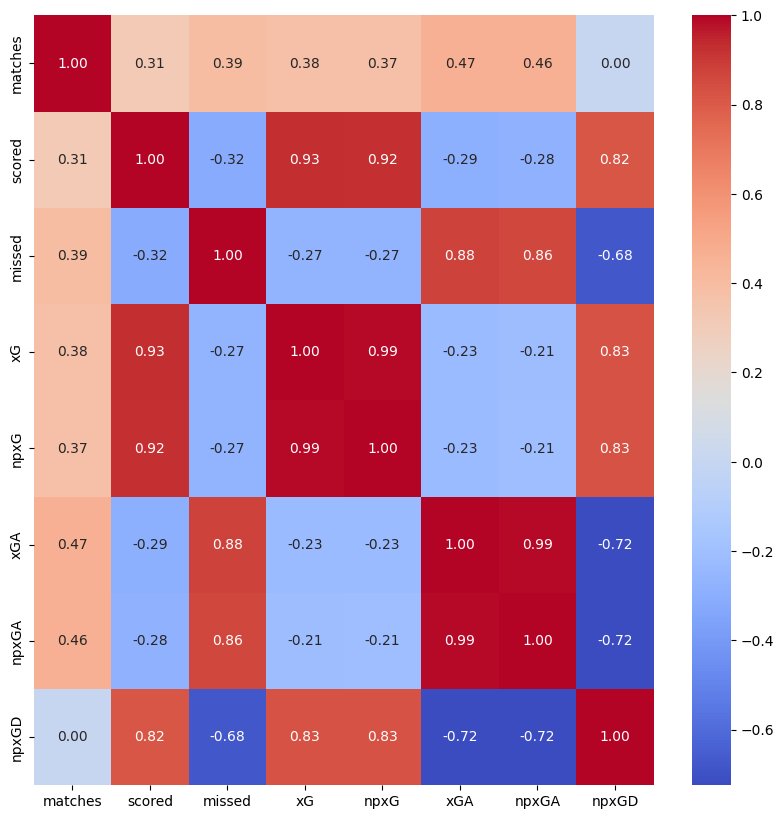

In [ ]:
# Correlation table to look at the relationship between Scored and xG
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm",cbar=True,fmt=".2f")
plt.show()

In [ ]:
# Separate the data, test and train
from sklearn.model_selection import train_test_split, cross_val_score

X=data[["xG"]]
y=data[["scored"]]

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=72)

In [ ]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train,y_train)

# Predict for the train data
y_train_pred= model.predict(X_train)
# Predict the test data
y_test_pred=model.predict(X_test)

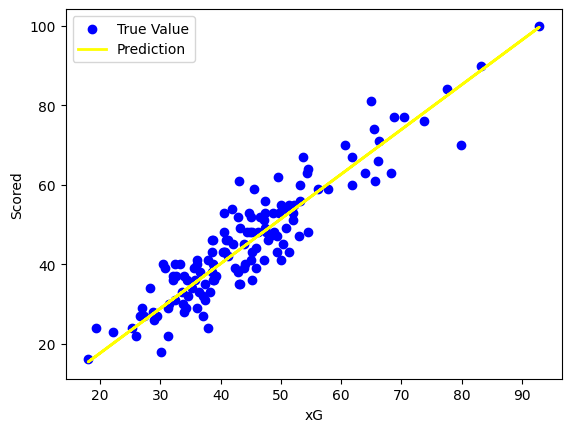

In [ ]:
# Visualize the Linear Regression
plt.scatter(X_test,y_test,color="blue",label="True Value")
plt.plot(X_test,y_test_pred, color="yellow",linewidth=2,label="Prediction")
plt.xlabel("xG")
plt.ylabel("Scored")
plt.legend()
plt.show()

In [ ]:
# Evaluation Metrics
import sklearn.metrics as sm
print("Mean Squared Error= ", round(sm.mean_squared_error(y_test,y_test_pred),2))
print("Explain variance Score: ", sm.explained_variance_score(y_test,y_test_pred))
print("Mean absolute error: ", sm.mean_absolute_error(y_test,y_test_pred))
print("R-squared: ", sm.r2_score(y_test,y_test_pred))

Mean Squared Error=  35.0
Explain variance Score:  0.8452442672645966
Mean absolute error:  4.732336081327423
R-squared:  0.8443510616027727


In [ ]:
# Cross validation
lr_score = cross_val_score(lr, data["xG"].values.reshape(-1, 1), data["scored"], cv=5, scoring="neg_mean_squared_error")
lr_mse = -np.mean(lr_score)
print("Mean Squared Error: ", lr_mse)

Mean Squared Error:  44.69379626587956


In [ ]:
#Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Desicion Tree Model
dt = DecisionTreeRegressor()
dt_model= dt.fit(X_train, y_train)

# Predict for the train data
y_train_pred= dt_model.predict(X_train)
# Predict for the test data
y_test_pred=dt_model.predict(X_test)

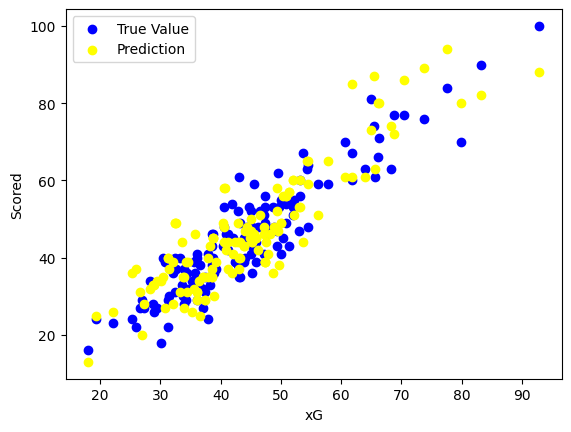

In [ ]:
# Visualize for Desicion Tree
plt.scatter(X_test, y_test, color="blue", label="True Value")
plt.scatter(X_test, y_test_pred, color="yellow", label="Prediction")
plt.xlabel("xG")
plt.ylabel("Scored")
plt.legend()
plt.show()


In [ ]:
# Evaluation Metrics
import sklearn.metrics as sm
print("Mean Squared Error= ", round(sm.mean_squared_error(y_test,y_test_pred),2))
print("Explain variance Score: ", sm.explained_variance_score(y_test,y_test_pred))
print("Mean absolute error: ", sm.mean_absolute_error(y_test,y_test_pred))
print("R-squared: ", sm.r2_score(y_test,y_test_pred))

Mean Squared Error=  81.66
Explain variance Score:  0.6398988774161143
Mean absolute error:  7.467153284671533
R-squared:  0.6368734925200563


In [ ]:
# Cross validation
dt_score = cross_val_score(dt, data["xG"].values.reshape(-1, 1), data["scored"], cv=5, scoring="neg_mean_squared_error")
dt_mse = -np.mean(dt_score)
print("Mean Squared Error: ", dt_mse)

Mean Squared Error:  85.31610133104337


In [ ]:
#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Model
rf = RandomForestRegressor()
Y_Train =y_train.values
rf_model= rf.fit(X_train, Y_Train.ravel())

# Predict for the train data
y_train_pred= rf_model.predict(X_train)
# Predict for the test data
y_test_pred=rf_model.predict(X_test)

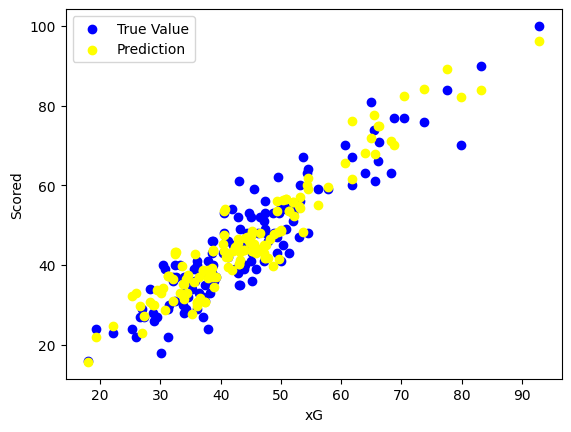

In [ ]:
# Visualize for Random Forest
plt.scatter(X_test, y_test, color="blue", label="True Value")
plt.scatter(X_test, y_test_pred, color="yellow", label="Prediction")
plt.xlabel("xG")
plt.ylabel("Scored")
plt.legend()
plt.show()

In [ ]:
# Evaluation Metrics
import sklearn.metrics as sm
print("Mean Squared Error= ", round(sm.mean_squared_error(y_test,y_test_pred),2))
print("Explain variance Score: ", sm.explained_variance_score(y_test,y_test_pred))
print("Mean absolute error: ", sm.mean_absolute_error(y_test,y_test_pred))
print("R-squared: ", sm.r2_score(y_test,y_test_pred))

Mean Squared Error=  54.35
Explain variance Score:  0.7594254154602879
Mean absolute error:  6.084525547445255
R-squared:  0.7583233877961058


In [ ]:
#Cross validation
rf_score = cross_val_score(rf, data["xG"].values.reshape(-1, 1), data["scored"], cv=5, scoring="neg_mean_squared_error")
rf_mse = -np.mean(rf_score)
print("Mean Squared Error: ", rf_mse)

Mean Squared Error:  63.85464079969944
